In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 10)

![title](img/theory.jpeg)

In [4]:
def NewtonianPotential(r, a = 1):
	return 1.0 / (r + a)

In [5]:
from sklearn import metrics


class PotentialClassifier:
	def __init__(self, train_x: np.array, train_y: np.array, kernel, window_width, epoch_number: int):
		self.classes = np.unique(train_y)
		self.train_x = train_x
		self.train_y = train_y
		self.gammas = np.zeros_like(train_y)
		self.indexes = np.arange(0, len(train_y))
		self.Kernel = kernel
		self.h = window_width
		self.epoch_number = epoch_number


	@staticmethod
	def minkowski_distances(u, v, p=2):
		return np.sum(((u - v) ** p), -1) ** (1 / p)


	def predict(self, x: np.array):
		test_x = np.copy(x)
		if len(test_x.shape) < 2:
			test_x = test_x[np.newaxis, :]
		u = test_x[:, np.newaxis, :]
		v = self.train_x[np.newaxis, :, :]
		distance = self.minkowski_distances(u, v)
		weights = self.gammas * self.Kernel(distance / self.h)
		table = np.zeros((test_x.shape[0], len(self.classes)))
		for Class in self.classes:
			table[:, Class] = np.sum(weights[:, self.train_y == Class], axis=1)
		return np.argmax(table, axis=1)


	def fit(self):
		self.gammas[0] = 1
		for _ in range(self.epoch_number):
			for i in range(self.train_x.shape[0]):
				if self.predict(self.train_x[i]) != self.train_y[i]: self.gammas[i] += 1
		# deleting zero charges
		non_zero_mask = self.gammas != 0
		self.train_x = self.train_x[non_zero_mask, ...]
		self.train_y = self.train_y[non_zero_mask, ...]
		self.gammas = self.gammas[non_zero_mask, ...]
		self.indexes = self.indexes[non_zero_mask, ...]


	def show_accuracy(self, test_x, test_y):
		predict_arr = self.predict(test_x)
		print(f'Accuracy on:'
			  f'\ntest is: {metrics.accuracy_score(test_y, predict_arr)};'
			  f'\ntrain is: {metrics.accuracy_score(self.train_y, self.predict(self.train_x))}.')


	def get_mistakes_indices(self, test_x, test_y):
		mistakes_indices = list()
		prediction = self.predict(test_x)
		for i in range(len(test_y)):
			if prediction[i] != test_y[i]: mistakes_indices.append(i)
		return mistakes_indices

In [6]:
potential_classifier = PotentialClassifier(train_x, train_y, NewtonianPotential, 10, 1)
potential_classifier.fit()
potential_classifier.show_accuracy(test_x, test_y)

Accuracy on:
test is: 0.9833333333333333;
train is: 0.8333333333333334.


Charges of nonzero points = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Percent of nonzero points = 20.0 %


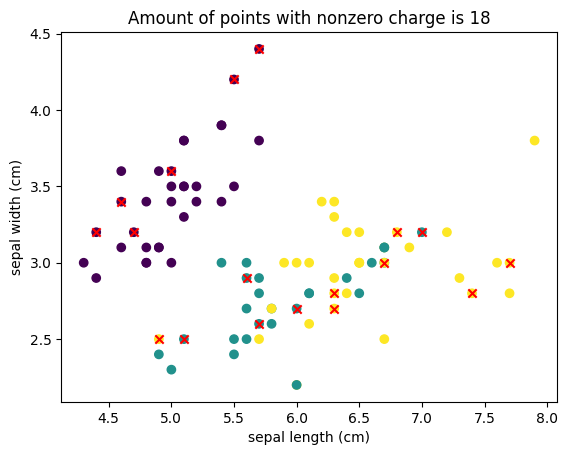

In [7]:
highlighted_features = (0, 1)
non_zero_points_indexes = potential_classifier.indexes
highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
plt.title(f"Amount of points with nonzero charge is {len(non_zero_points_indexes)}")
plt.scatter(train_x[:, highlighted_features[0]], train_x[:, highlighted_features[1]], c=train_y)
plt.scatter(train_x[:, highlighted_features[0]][non_zero_points_indexes], train_x[:, highlighted_features[1]][non_zero_points_indexes], c='r', marker='x')
plt.xlabel(highlighted_features_names[0])
plt.ylabel(highlighted_features_names[1])
print(f'Charges of nonzero points = {potential_classifier.gammas}')
print(f'Percent of nonzero points = {len(non_zero_points_indexes) / train_x.shape[0] * 100} %')

In [8]:
mistakes_indexes = potential_classifier.get_mistakes_indices(test_x, test_y)

Points where prediction is wrong (count = 1)
Percent of mistakes = 1.1111111111111112 %


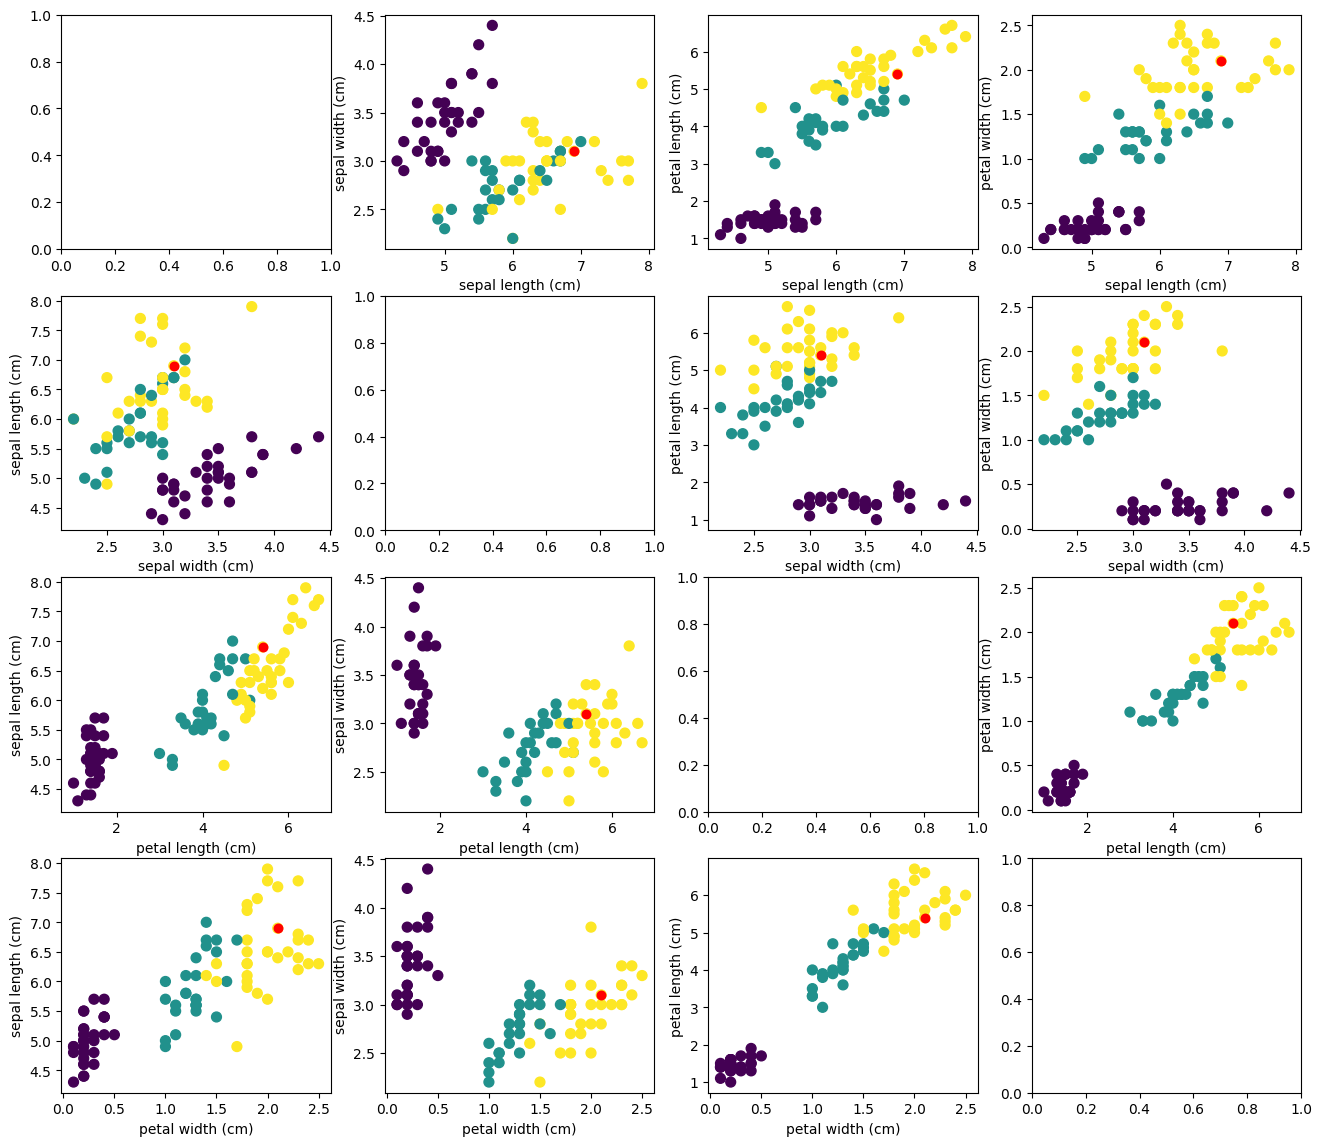

In [9]:
plt.figure(figsize=(16, 14), dpi = 100)
print(f"Points where prediction is wrong (count = {len(mistakes_indexes)})")
i = 0
for x_ in range(len(feature_names)):
    for y_ in range(len(feature_names)):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            continue
        else:
            plt.scatter(train_x[:, x_], train_x[:, y_], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, x_][mistakes_indexes], train_x[:, y_][mistakes_indexes], c ='r', marker='.', s = 150) # точки с ложными предсказанием
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])
print(f'Percent of mistakes = {len(mistakes_indexes) / train_x.shape[0] * 100} %')